Who said that?

Step 1, basic cleaning up.

In [1]:
import re

# Function to clean message text
def clean_message(message):
    # Remove Unicode left-to-right mark
    message = message.replace('\u200e', '')
    # Remove unwanted words
    unwanted_words = ['image', 'omitted' , 's', 'm']
    for word in unwanted_words:
        message = re.sub(r'\b' + word + r'\b', '', message)
    # Handle contractions (remove standalone 's')
    message = re.sub(r"\b's\b", '', message)
    return message

# Step 1: Load Data
with open('chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Step 2: Clean Data
pattern = re.compile(r'\[(.*?)\] (.*?): (.*)')

structured_data = []
for line in chat_data:
    match = pattern.match(line)
    if match:
        timestamp, participant, message = match.groups()
        cleaned_message = clean_message(message)
        structured_data.append({'timestamp': timestamp, 'participant': participant, 'message': cleaned_message})

# Step 3: Displaying a Sample
print(structured_data[:5])

[{'timestamp': '2023-10-19, 7:56:33 PM', 'participant': '🚨🚨Yene & Associates🚨🚨', 'message': 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.'}, {'timestamp': '2023-10-19, 7:56:33 PM', 'participant': 'Nick Nikolov', 'message': 'Nick Nikolov created this group'}, {'timestamp': '2023-10-19, 8:05:43 PM', 'participant': '🚨🚨Yene & Associates🚨🚨', 'message': 'Nick Nikolov added you'}, {'timestamp': '2023-10-19, 8:13:06 PM', 'participant': 'Yajur Vashisht', 'message': 'Since this is the war room chat'}, {'timestamp': '2023-10-19, 8:13:10 PM', 'participant': 'Yajur Vashisht', 'message': 'I just wanna say something'}]


Step 2, EDA.

In [2]:
import pandas as pd

# Convert structured data to a DataFrame
df = pd.DataFrame(structured_data)

# Display basic statistics
print("Number of messages per participant:")
print(df['participant'].value_counts())

print("\nAverage length of messages per participant:")
df['message_length'] = df['message'].apply(len)
print(df.groupby('participant')['message_length'].mean())

Number of messages per participant:
participant
Andrew                   32233
Nick Nikolov             23878
BK                       19725
Yajur Vashisht           12921
Yene                      6708
Yaad                      5883
Satchy South Side         3866
Dillon P                  3854
Romil                     3710
~ Tahmid Kazi             2335
~ Momin                    402
~ Matt                     384
Meta AI                    133
Chris Conweezy             127
~ Gi-e Thang                52
Shad Sajid                  15
🚨🚨Yene & Associates🚨🚨        7
🌈🚨2SLGBTQIA+🚨🌈               6
‎You                         3
Name: count, dtype: int64

Average length of messages per participant:
participant
Andrew                    19.229982
BK                        21.879899
Chris Conweezy            38.826772
Dillon P                  46.188116
Meta AI                  134.398496
Nick Nikolov              23.994556
Romil                     31.228032
Satchy South Side         32

Frequency Analysis

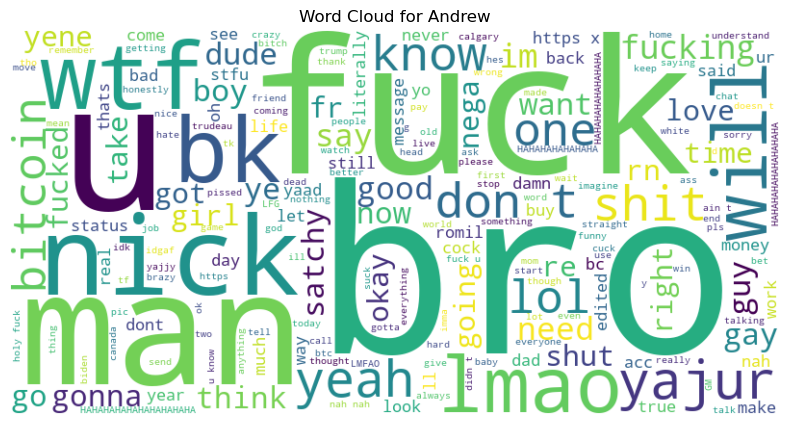

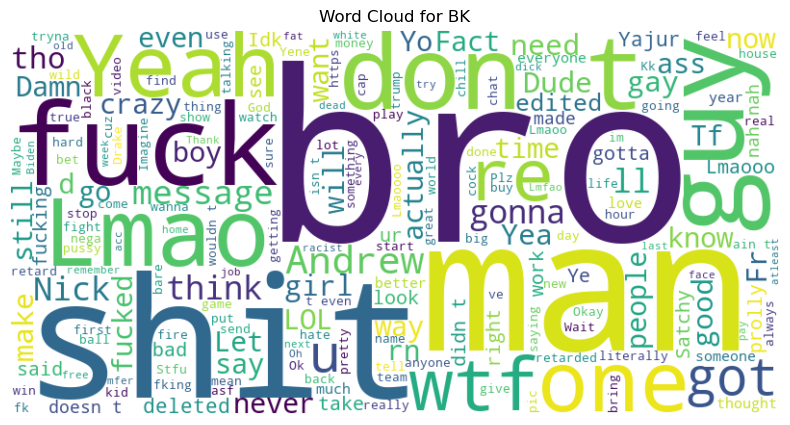

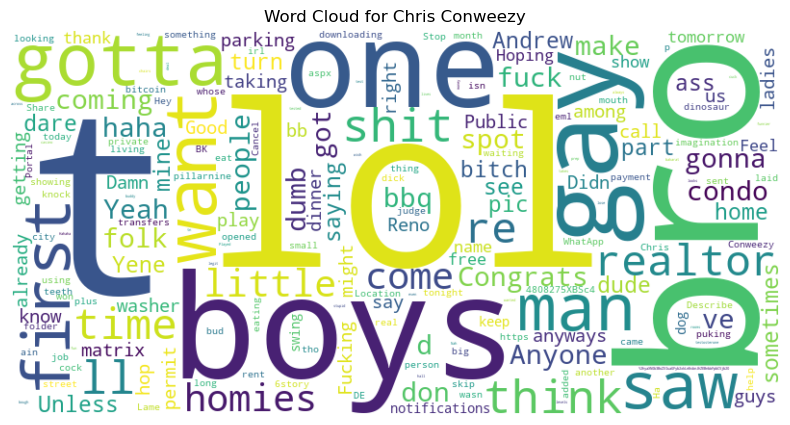

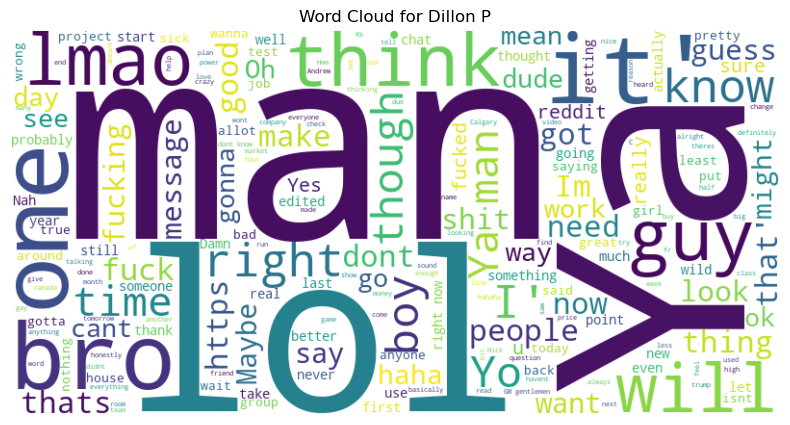

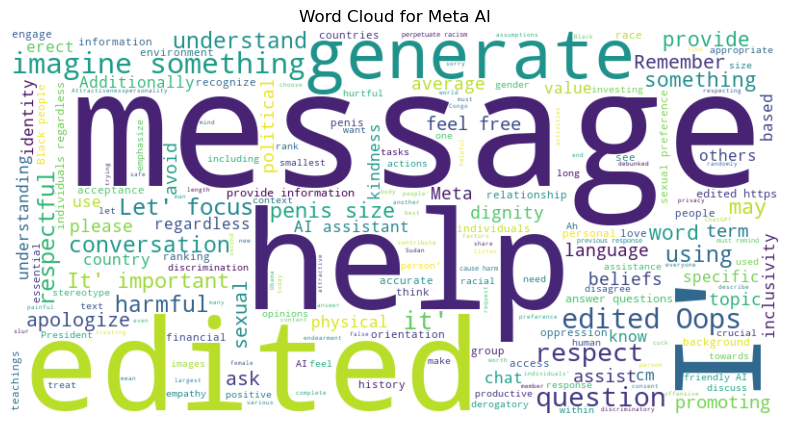

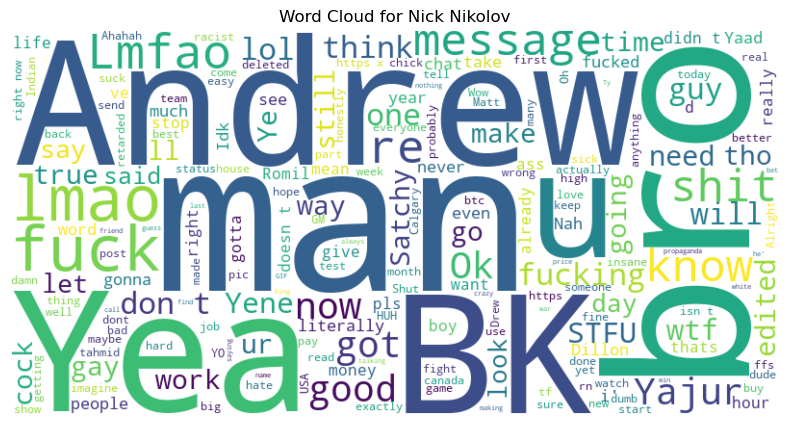

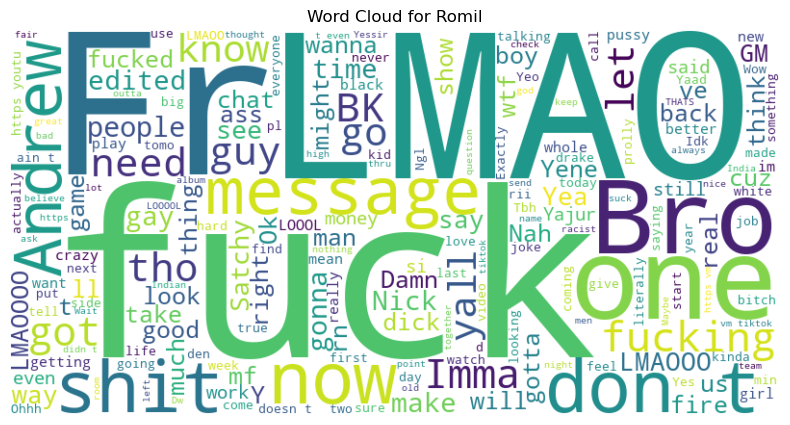

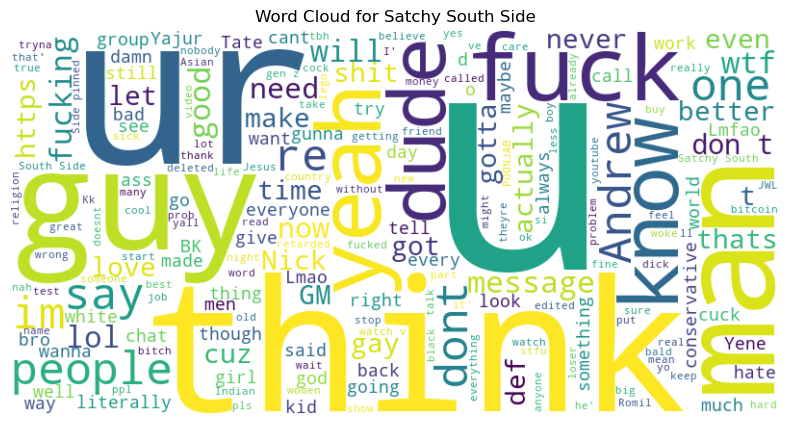

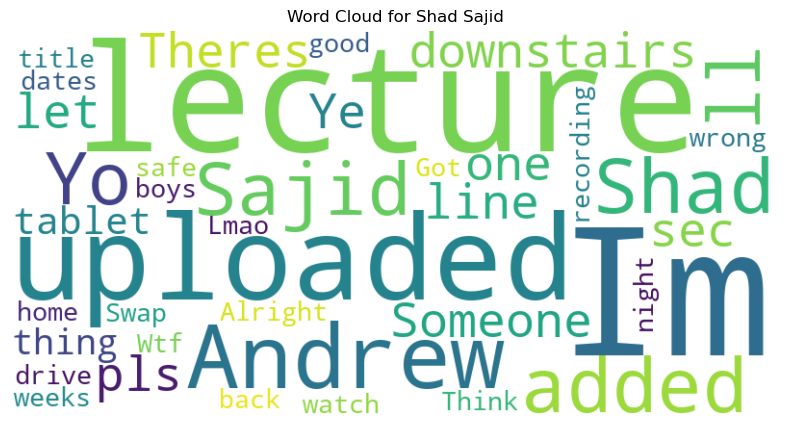

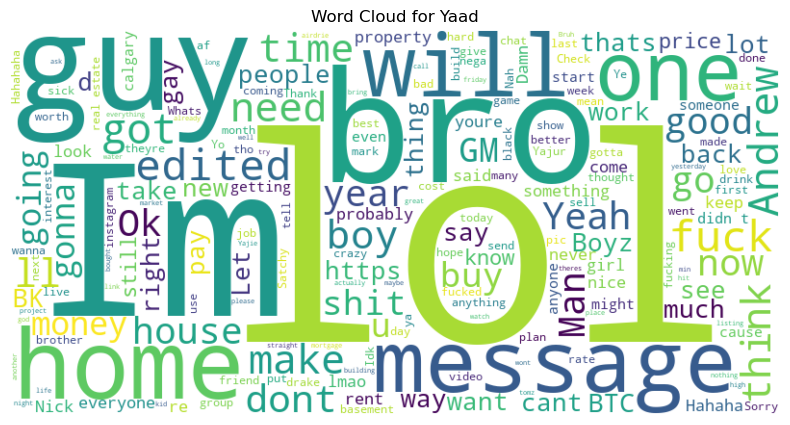

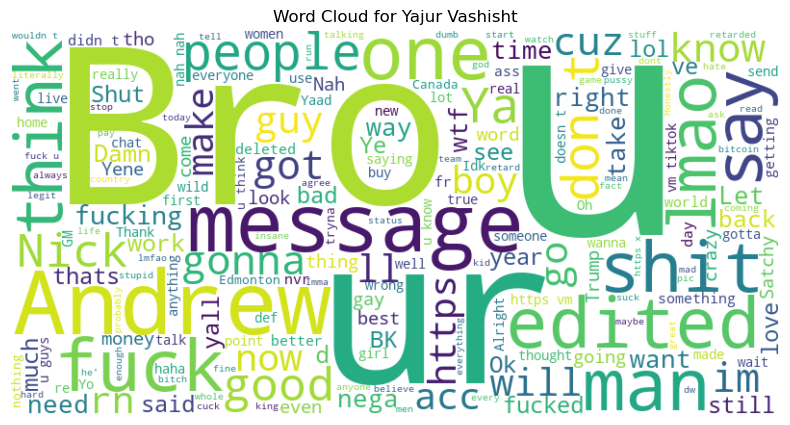

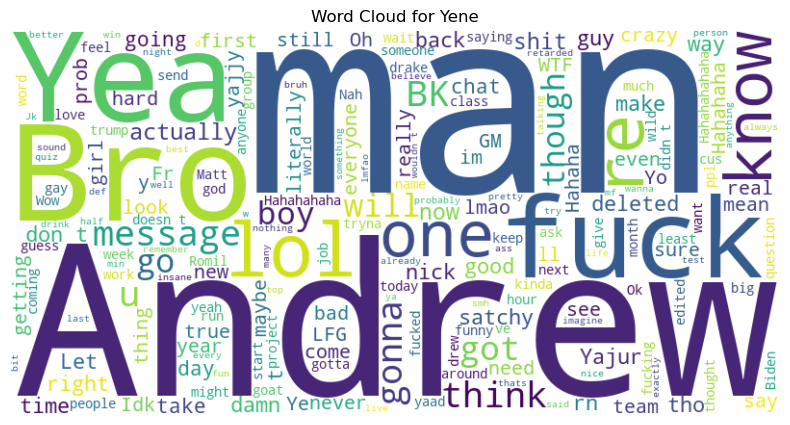

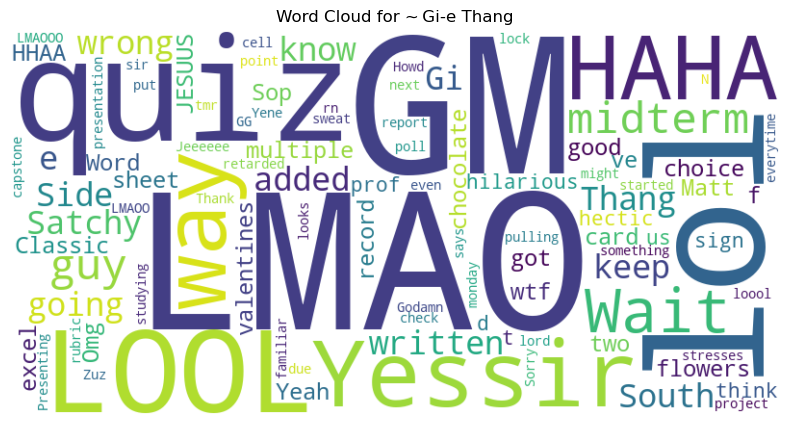

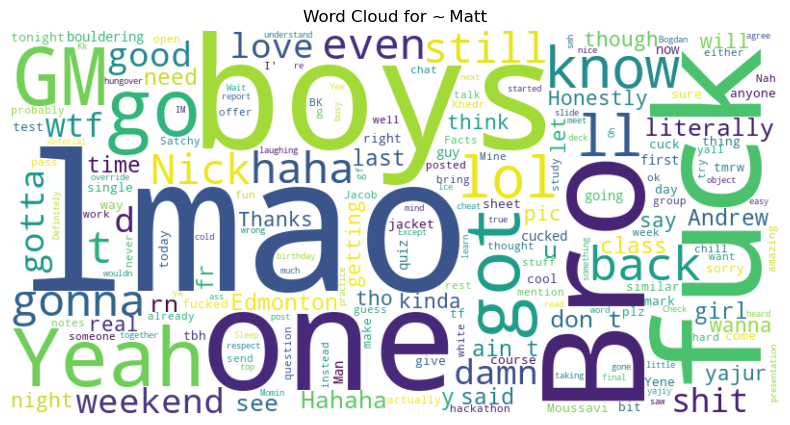

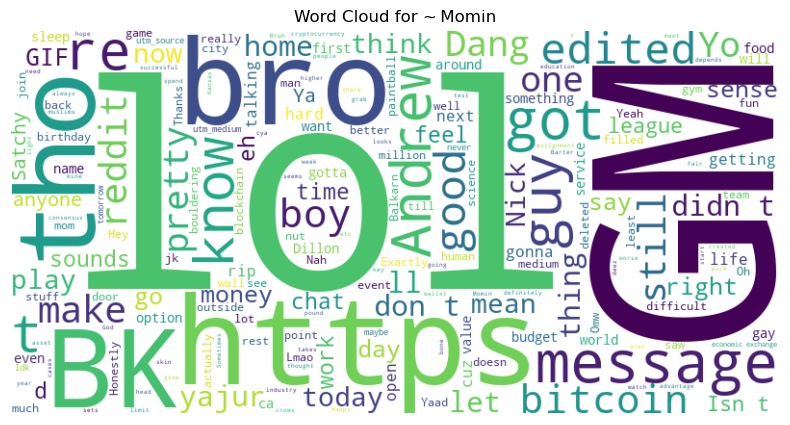

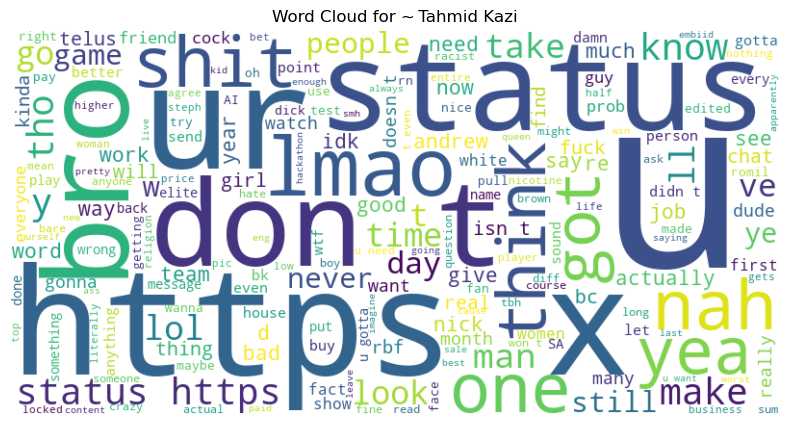

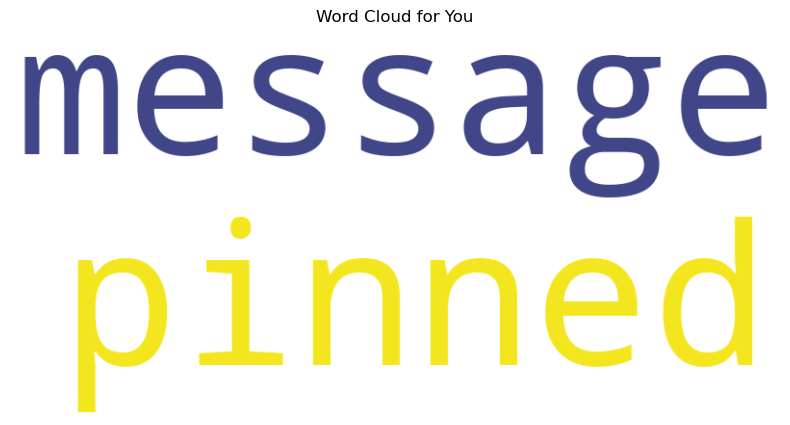

/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


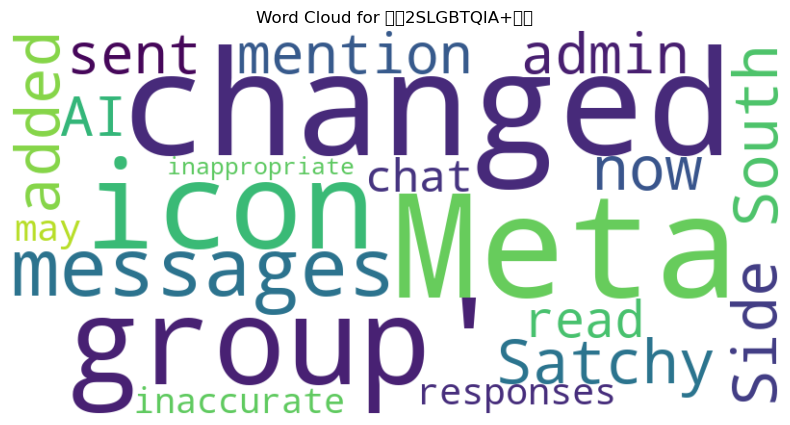

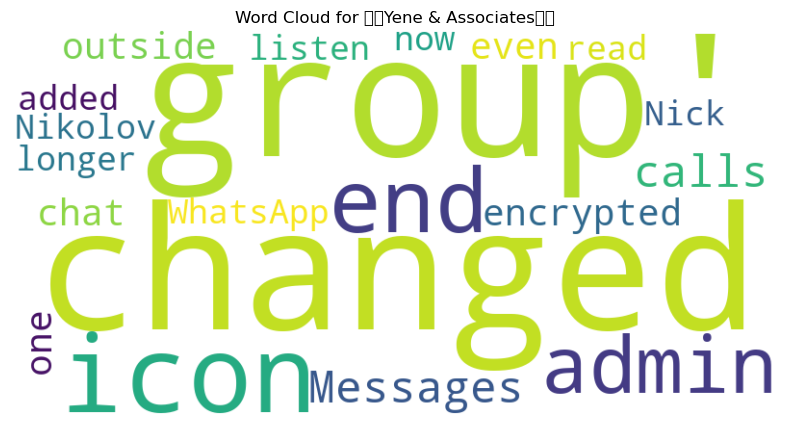

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all messages for each participant
participant_messages = df.groupby('participant')['message'].apply(' '.join)

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each participant
for participant, messages in participant_messages.items():
    generate_word_cloud(messages, f'Word Cloud for {participant}')

Data Visualization

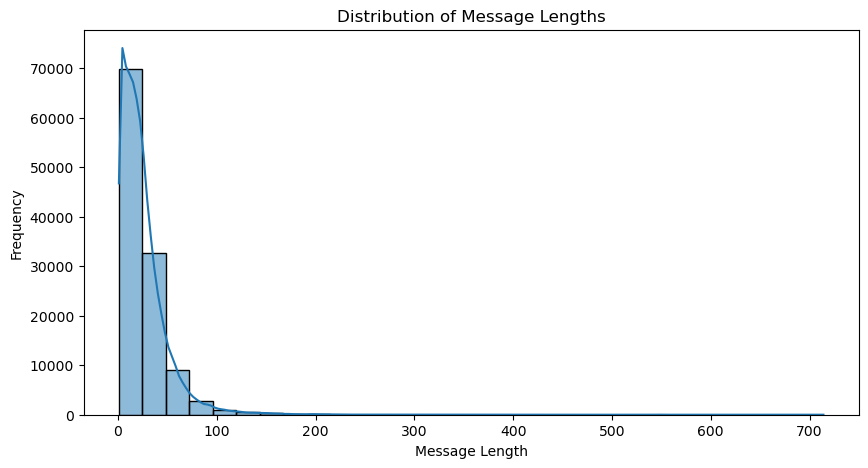

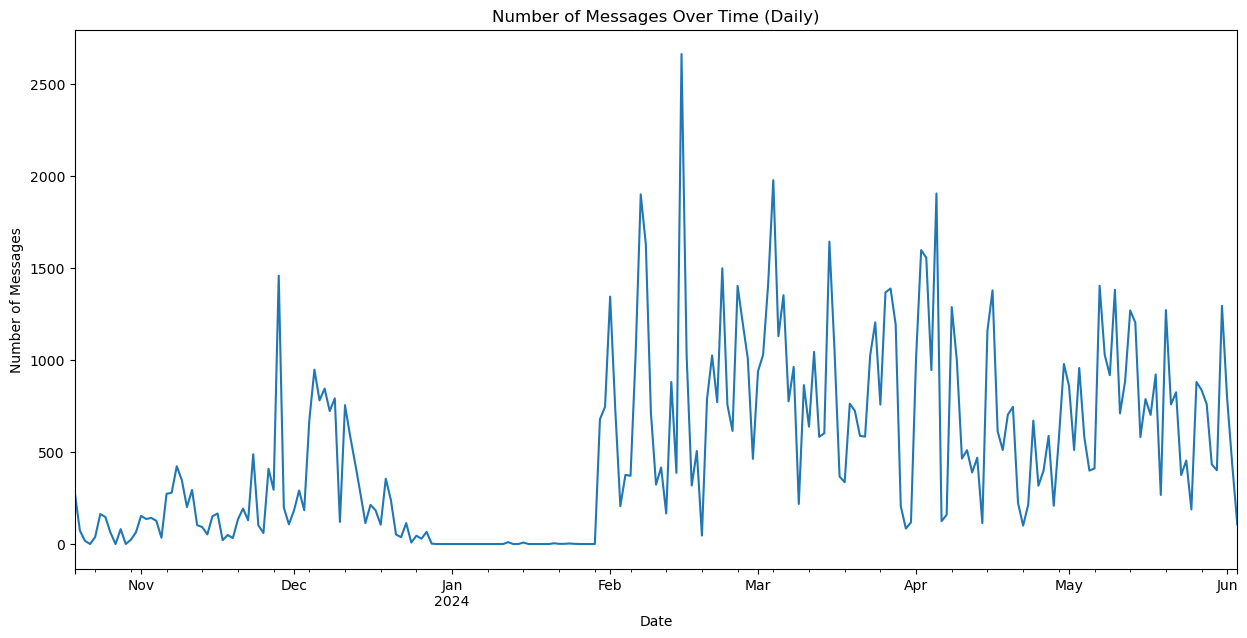

In [4]:
import seaborn as sns

# Distribution of message lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['message_length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Number of messages over time (daily or monthly)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d, %I:%M:%S %p')
df.set_index('timestamp', inplace=True)

plt.figure(figsize=(15, 7))
df['message'].resample('D').count().plot()
plt.title('Number of Messages Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()

#TODO: Install necessary libraries

Preprocess the data by tokenizing the text and encoding labels:

In [ ]:
# from sklearn.model_selection import train_test_split
# from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# # Split the data into training and test sets
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['participant'])

# # Load the BERT tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Tokenize the text
# def tokenize_data(text):
#     return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

# train_encodings = train_df['message'].apply(tokenize_data)
# test_encodings = test_df['message'].apply(tokenize_data)

In [12]:
import transformers
import huggingface_hub

print(transformers.__version__)
print(huggingface_hub.__version__)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/4b/f7w4s28x19z5r8hbcyrcgppc0000gn/T/ipykernel_5473/1023570490.py", line 1, in <module>
    import transformers
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/transformers/__init__.py", line 30, in <module>
    from . import dependency_versions_check
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/transformers/dependency_versions_check.py", line 17, in <module>
    from .utils.versions import require_version, require_version_core
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/transformers/utils/__init__.py", line 90, in <module>
    from .import_utils import (
ImportError: cannot import name 'is_more_itertools_available' from 'transformers.utils.import_ut

In [13]:
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Function to tokenize data
def tokenize_data(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

# Load data
# Assuming df is your DataFrame containing 'message' and 'participant' columns

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['participant'])

# Tokenize the text
train_encodings = train_df['message'].apply(tokenize_data).tolist()
test_encodings = test_df['message'].apply(tokenize_data).tolist()

# Check the encodings
print(train_encodings[0])

# Convert to tensor
train_encodings = {key: torch.cat([d[key] for d in train_encodings]) for key in train_encodings[0]}
test_encodings = {key: torch.cat([d[key] for d in test_encodings]) for key in test_encodings[0]}

# Convert labels to numerical values
train_labels = train_df['participant'].astype('category').cat.codes.values
test_labels = test_df['participant'].astype('category').cat.codes.values


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/4b/f7w4s28x19z5r8hbcyrcgppc0000gn/T/ipykernel_5473/4041749111.py", line 3, in <module>
    from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/transformers/__init__.py", line 30, in <module>
    from . import dependency_versions_check
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/transformers/dependency_versions_check.py", line 17, in <module>
    from .utils.versions import require_version, require_version_core
  File "/Users/yeneirvine/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/transformers/utils/__init__.py", line 90, in <module>
    from .import_utils import (
ImportError: canno

Prepare data for BERT

In [11]:
import torch

class ChatDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)



# train_labels = train_df['participant'].astype('category').cat.codes.values
# test_labels = test_df['participant'].astype('category').cat.codes.values

train_dataset = ChatDataset(train_encodings, train_labels)
test_dataset = ChatDataset(test_encodings, test_labels)

print(train_dataset[0])

{'input_ids': tensor([ 101, 1398, 5748, 4541,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

Fine-tuning for text classification

In [ ]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=len(train_df['participant'].unique()))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

In [ ]:
# Evaluate the model
results = trainer.evaluate()
print(results)

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)
labels = test_labels

# Calculate metrics
accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=1)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


NameError: name 'trainer' is not defined

In [17]:
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['participant'].astype('category').cat.categories, yticklabels=train_df['participant'].astype('category').cat.categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'labels' is not defined

In [18]:
# Get the unique classes
classes = train_df['participant'].astype('category').cat.categories

# Initialize a dictionary to hold the accuracy for each class
label_wise_accuracy = {}

# Calculate accuracy for each class
for i, class_name in enumerate(classes):
    # Get indices of samples belonging to the current class
    class_indices = np.where(labels == i)
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(labels[class_indices], preds[class_indices])
    
    # Store the accuracy in the dictionary
    label_wise_accuracy[class_name] = class_accuracy

# Print label-wise accuracy
for class_name, accuracy in label_wise_accuracy.items():
    print(f"Accuracy for {class_name}: {accuracy}")

NameError: name 'labels' is not defined

In [ ]:
# Save the trained model
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')

In [19]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load model and tokenizer
model = BertForSequenceClassification.from_pretrained('./trained_model')
tokenizer = BertTokenizer.from_pretrained('./trained_model')

print("Model and tokenizer loaded successfully")

Model and tokenizer loaded successfully


In [20]:
import json

# Assuming train_df is already defined
# Create the mapping
label_mapping = train_df['participant'].astype('category').cat.categories.to_list()

# Save the mapping to a file
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

print("Label mapping created and saved successfully")


Label mapping created and saved successfully


In [21]:
# Load the label mapping
with open('label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

print("Label mapping loaded successfully")
print(label_mapping)


Label mapping loaded successfully
['Andrew', 'BK', 'Chris Conweezy', 'Dillon P', 'Meta AI', 'Nick Nikolov', 'Romil', 'Satchy South Side', 'Shad Sajid', 'Yaad', 'Yajur Vashisht', 'Yene', '~\u202fGi-e Thang', '~\u202fMatt', '~\u202fMomin', '~\u202fTahmid Kazi', '\u200eYou', '🌈🚨2SLGBTQIA+🚨🌈', '🚨🚨Yene & Associates🚨🚨']
